# MAIN CODE:

**PLEASE DO NOT DELETE !!**

In [17]:
# Step 1: INSTALL DEPENDENCIES
# I have personally installed all the "requirementes.txt" file

import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

print ("Step 2: DOWNLOADING THE HTML")

resource_url = "https://ycharts.com/companies/TSLA/revenues"

print ("\n- First of all, will select the resource to download from the designated webpage." "\n  In this case: https://ycharts.com/companies/TSLA/revenues")

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
response = requests.get(resource_url, headers=headers)

print ("\n- If the request has been executed correctly (code 200), then the HTML content of the page has been downloaded:")

if response.status_code == 200:
    with open("revenues.html", "wb") as dataset:
      dataset.write(response.content) 
    print("\n  HTML content downloaded successfully !")
else:
    print(f"Request failed with status code: {response.status_code}")

response


Step 2: DOWNLOADING THE HTML

- First of all, will select the resource to download from the designated webpage.
  In this case: https://ycharts.com/companies/TSLA/revenues

- If the request has been executed correctly (code 200), then the HTML content of the page has been downloaded:

  HTML content downloaded successfully !


<Response [200]>

In [18]:
print ("Step 3: TRANSFORMING THE HTML")
   

# We transform the flat HTML into real HTML (structured and nested, tree-like)
print ("\nThe request was executed correctly (code 200), then the file could be downloaded," "\nAnd the file was stored in the directory **response.txt** to obtain:\n""1. All the tables.""\n2. The table with the quarterly evolution.\n""3. Store the data in a DataFrame.\n")
 
with open("revenues.html", "w", encoding="utf-8") as dataset:
      dataset.write(response.text)

    # Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')
soup

Step 3: TRANSFORMING THE HTML

The request was executed correctly (code 200), then the file could be downloaded,
And the file was stored in the directory **response.txt** to obtain:
1. All the tables.
2. The table with the quarterly evolution.
3. Store the data in a DataFrame.




<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
            newViewport.setAttribute('name', 'viewport');
            newViewport.setAttribute('content', 'width=' + minWidth);
            document.head.appendChild(newViewport);
        }
    }
</script>
<script>
    if (navigator.userAgent.indexOf('Trident') !== -1 || navigator.userAgent.indexOf('MSIE') !== -1) {
        window.onload=function() {
            var ie_banner = document.createElement('div');
            ie_banner.innerT

In [19]:
tables = soup.find_all("table")
tables

[<table class="table">
 <thead>
 <tr>
 <th>Date</th>
 <th class="text-right">Value</th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>September 30, 2024</td>
 <td class="text-right">
                             
                                 25.18B
                             
                         </td>
 </tr>
 <tr>
 <td>June 30, 2024</td>
 <td class="text-right">
                             
                                 25.50B
                             
                         </td>
 </tr>
 <tr>
 <td>March 31, 2024</td>
 <td class="text-right">
                             
                                 21.30B
                             
                         </td>
 </tr>
 <tr>
 <td>December 31, 2023</td>
 <td class="text-right">
                             
                                 25.17B
                             
                         </td>
 </tr>
 <tr>
 <td>September 30, 2023</td>
 <td class="text-right">
                             
              

In [ ]:
import pandas as pd

# Filtering the table from url that contains 'Revenue'
for table in tables:
    if "Date" in str(table):
        target_table = table
        break

# Now we create a DataFrame from the identified table:
rows = target_table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip().replace("$", "").replace(",", "") for col in cols if col.text.strip()]
    if cols:
        data.append(cols)

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date", "Revenue"])

# This way we'll display the max number of rows existing:
pd.set_option('display.max_rows', None)

print(df)

                 Date Revenue
0   September 30 2024  25.18B
1        June 30 2024  25.50B
2       March 31 2024  21.30B
3    December 31 2023  25.17B
4   September 30 2023  23.35B
5        June 30 2023  24.93B
6       March 31 2023  23.33B
7    December 31 2022  24.32B
8   September 30 2022  21.45B
9        June 30 2022  16.93B
10      March 31 2022  18.76B
11   December 31 2021  17.72B
12  September 30 2021  13.76B
13       June 30 2021  11.96B
14      March 31 2021  10.39B
15   December 31 2020  10.74B
16  September 30 2020  8.771B
17       June 30 2020  6.036B
18      March 31 2020  5.985B
19   December 31 2019  7.384B
20  September 30 2019  6.303B
21       June 30 2019   6.35B
22      March 31 2019  4.541B
23   December 31 2018  7.226B
24  September 30 2018  6.824B


In [21]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection


In [22]:
#cursor = connection.cursor()
#cursor.execute("""CREATE TABLE Revenue_1 (Date, Revenue)""")

import sqlite3

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("financial_data.db")

# Store the DataFrame in the SQLite database
# If the table 'revenue_data' already exists, replace it
df.to_sql("revenue_data", conn, if_exists="replace", index=False)

# Commit and close the connection
conn.commit()
conn.close()

print("Data has been stored in SQLite database successfully.")

Data has been stored in SQLite database successfully.


In [ ]:
from pprint import pprint

# Converting data in the dataframe (df) into a list of tuples:
#df_tuples = list(df.to_records(index=False))

df_tuples = list(df.to_records(index=False))

pprint(df_tuples[:25])  # We can adjust the number of tuples as needed :)

[np.record(('September 30 2024', '25.18B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('June 30 2024', '25.50B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('March 31 2024', '21.30B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('December 31 2023', '25.17B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('September 30 2023', '23.35B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('June 30 2023', '24.93B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('March 31 2023', '23.33B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('December 31 2022', '24.32B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('September 30 2022', '21.45B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('June 30 2022', '16.93B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('March 31 2022', '18.76B'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('December 31 2021', '17.72B'), dtype=[('Date', 'O'), ('Revenue', 'O')])

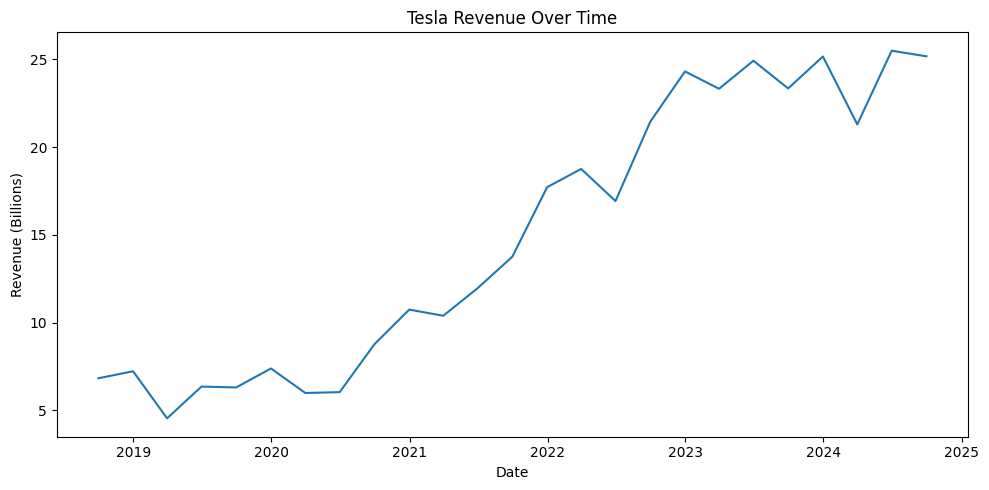

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already populated with the data and contains 'Date' and 'Revenue'
# Convert 'Date' to datetime format and ensure it's sorted chronologically
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = df['Revenue'].replace({'B': ''}, regex=True).astype('float')  # Example to handle billions formatting if needed
df = df.sort_values('Date')

# Plotting the data
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Revenue', ax=axis)

# Formatting the plot
axis.set_title("Tesla Revenue Over Time")
axis.set_xlabel("Date")
axis.set_ylabel("Revenue (Billions)")

plt.tight_layout()
plt.show()

/tmp/ipykernel_629/3082103874.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_revenue = df['Revenue'].resample('Q').sum().reset_index()


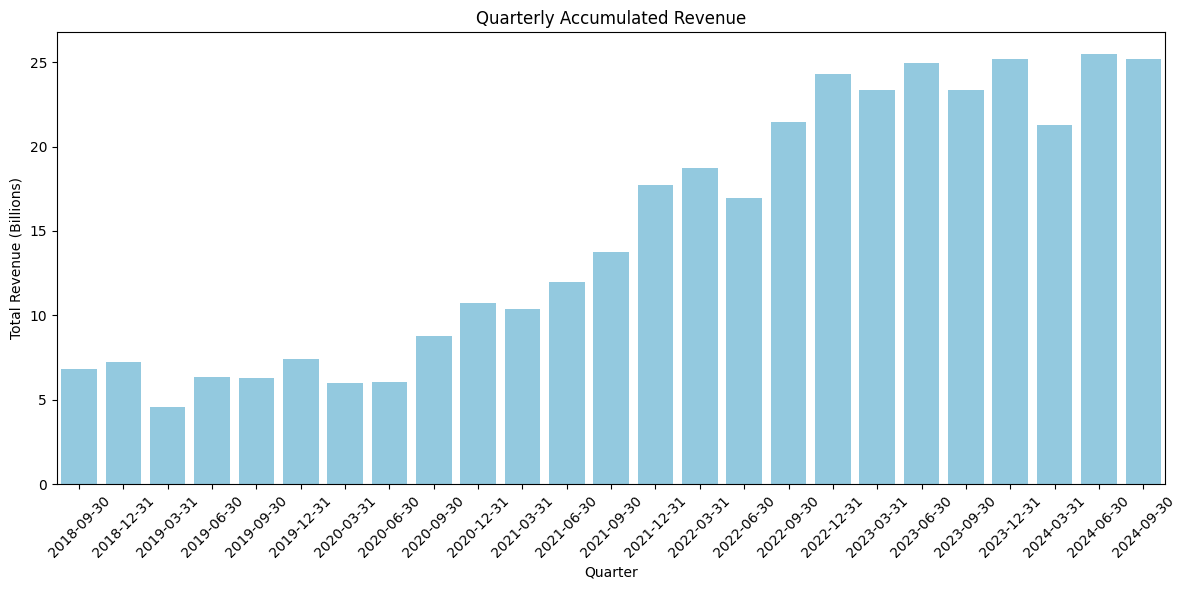

In [25]:
# Resample data to get quarterly accumulated revenue
df.set_index('Date', inplace=True)
quarterly_revenue = df['Revenue'].resample('Q').sum().reset_index()

# Plotting the quarterly accumulated revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=quarterly_revenue, x='Date', y='Revenue', color='skyblue')
plt.title("Quarterly Accumulated Revenue")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue (Billions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_629/4006080599.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_revenue = df['Revenue'].resample('M').mean().reset_index()


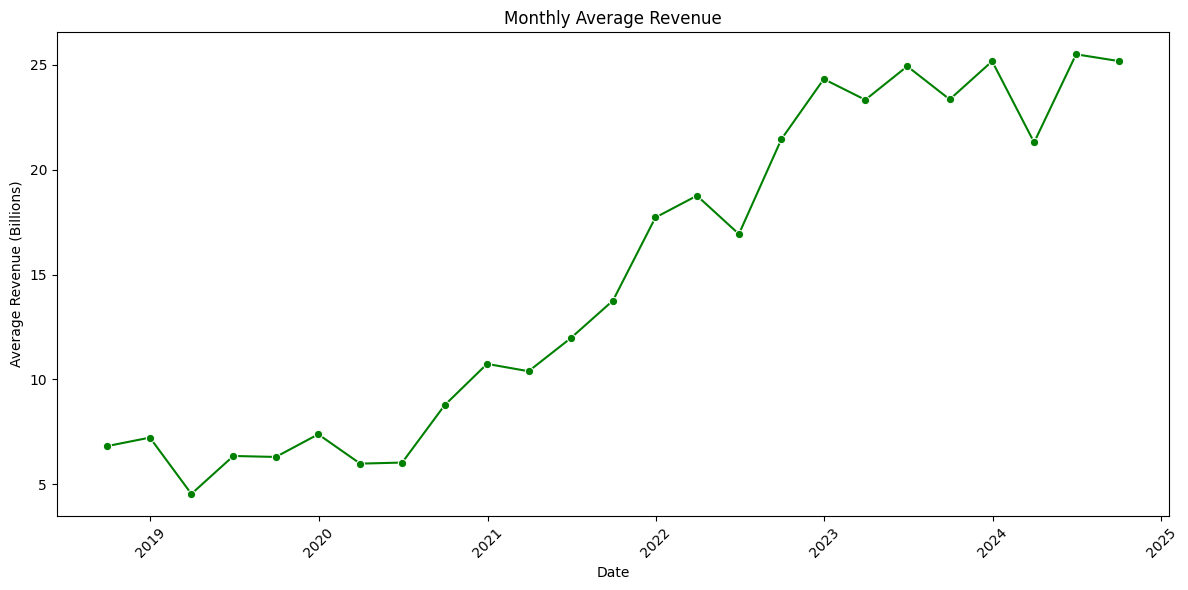

In [ ]:
# Group data to get monthly average revenue
monthly_avg_revenue = df['Revenue'].resample('M').mean().reset_index()

# Plotting the monthly average revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_revenue, x='Date', y='Revenue', marker='o', color='green')
plt.title("Monthly Average Revenue")
plt.xlabel("Date")
plt.ylabel("Average Revenue (Billions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()